# ISOM5160 Project - Group7

- **Dataset:** amazon_food_reviews.csv
- **Topic:** AI Driven Personalized Product Improvement Recommendation System for Amazon Sellers
- **Individual Contribution:**

    | Name          | SID      | Contributions                                                                                                          |
    |---------------|----------|------------------------------------------------------------------------------------------------------------------------|
    | CAO, Xi       | 21271664 | 评论文本预处理 + 情感分析 + 评论关键词提取 +数据清洗                                                                                                 |
    | LI, Heyi      |          | 评论、评分异常值分析 （基于评论情感分析）、 PPT 统筹                                                                                          |
    | LIAO, Jingyu  | 21262106 | 差评原因分析   （基于评论关键词）                                                                                                     |
    | LIN, Chuwei   |          | 评分时间趋势分析                                                                                                               |
    | YE, Chenwei   | 21199517 | 用户评论权重分析                                                                                                               |
    | ZHANG, Ziyang | 21266920 | 1. Data scraping: additional amazon product info <br/>2. Analyse: Correlation Between Ratings and Product Descriptions |



## 0. Install requirements and do initialization
1. Install requirements and load 'amazon_food_reviews.csv'
2. Scrape product info from *amazon.com*
3. Load product info and concat to original dataset

In [1]:
# Run first to install requirements
!pip install -r requirements.txt

# Run this to speed up the data scraping process
!unzip -oq new_data.zip


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

from amazon_new_data_scraping import parallel_scrape_amazon_product_info, load_all_data_as_dataframe, \
    extract_comments_from_product_info

df_amazon_food_reviews = pd.read_csv('amazon_food_reviews.csv',
                                     converters={"Time": lambda x: pd.to_datetime(int(x), unit="s")})

In [3]:
product_id_list = list(df_amazon_food_reviews.ProductId.unique())
print(f"Total number of products: {len(product_id_list)}")
print("Start scraping data...")
parallel_scrape_amazon_product_info(product_id_list, replace=False)
print("Scraping finished.")
df_amazon_product_info = load_all_data_as_dataframe()
print("Product info loaded.")
df_amazon_product_info

Total number of products: 4322
Start scraping data...
Using 10 CPU cores for parallel scraping


Scraping amazon products: 100%|██████████| 4322/4322 [00:01<00:00, 3633.56it/s]


Successfully scraped 4322/4322 products
Scraping finished.


Loading product info: 100%|██████████| 4322/4322 [00:00<00:00, 8986.83it/s]


Product info loaded.


,product_id,product_title,byline_info,product_description,category,alt_images,product_detail,important_information,top_comments,CountAltImages,Score,ScoreDistribution,ScorePolarizationIndex,NumRatings,IsFood
0,B0007GFDP4,Korean Seaweed 0.17oz5gea-4 Packs,Brand: JN,Freshness Guaranteed Premium Seaweed Winter Ha...,"[Grocery & Gourmet Food, Pantry Staples, Cooki...",[https://m.media-amazon.com/images/I/51uDkERYg...,{'Product Dimensions': '6.1 x 3.35 x 2.3 inche...,{'Ingredients': 'Seaweed. non gmo com oil. non...,"[{'date': 'March 22, 2013', 'title': 'Best Tas...",4,3.8,"[20.0, 0.0, 19.0, 0.0, 61.0]",0.483701,6,True
1,B000EMEEHE,GIN GINS Original Ginger Chews by The Ginger P...,Visit the The Ginger People Store,Deliciously spicy-sweet chewy ginger candies m...,"[Grocery & Gourmet Food, Snacks & Sweets, Cand...",[https://m.media-amazon.com/images/I/41KQy5H4V...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{'Safety Information': 'Made in a facility tha...,"[{'date': 'July 9, 2014', 'title': 'Truly Life...",7,3.2,"[23.0, 9.0, 27.0, 9.0, 32.0]",0.281807,62,True
2,B000E671W0,"Celestial Seasonings Peppermint Herbal Tea, Ca...",Visit the Celestial Seasonings Store,Nothing is more soothing than a cup of your fa...,"[Grocery & Gourmet Food, Beverages, Tea, Fruit...",[https://m.media-amazon.com/images/I/61iWD7RnS...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{'Safety Information': 'This product is labell...,"[{'date': 'August 3, 2025', 'title': 'DELICIOU...",6,4.8,"[2.0, 1.0, 2.0, 7.0, 88.0]",0.166892,37825,True
3,B000084E76,"Kookamunga Krazee Kitty Catnip Bubbles, 5 oz",Visit the KOOKAMUNGA Store,Make your cats go wild with this fun product. ...,"[Pet Supplies, Cats, Toys, Catnip Toys]",[https://m.media-amazon.com/images/I/4124SxrG1...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"[{'date': 'July 17, 2015', 'title': 'My cat is...",3,3.2,"[26.0, 12.0, 12.0, 13.0, 37.0]",0.319141,728,False
4,B0009TQC90,Golden Dragon - Finest Chrysanthemum Pu Erh Te...,Brand: Golden Dragon,a specially selected of buds and young leaves ...,"[Grocery & Gourmet Food, Beverages, Tea, Black]",[https://m.media-amazon.com/images/I/51hGQNcQz...,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",{'Legal Disclaimer': 'Statements regarding die...,"[{'date': 'January 7, 2012', 'title': 'Not exa...",7,3.2,"[10.0, 20.0, 32.0, 10.0, 28.0]",0.224108,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,B0006VB3WC,Katz-n-Flocken All Life Stages Cat Food - 15 lbs,Visit the Solid Gold Store,"Ideal for adult cats and kittens, to maintain ...","[Pet Supplies, Cats, Food]",[https://m.media-amazon.com/images/I/517dkgAGm...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"[{'date': 'November 25, 2011', 'title': 'Katz-...",5,4.4,"[9.0, 0.0, 14.0, 0.0, 77.0]",0.382746,23,True
3377,B0001PB99K,Maker's Mark Bourbon Flavored Gourmet Cherries...,,,"[Grocery & Gourmet Food, Pantry Staples, Canne...",[https://m.media-amazon.com/images/I/31CDQM754...,"{'Is Discontinued By Manufacturer': 'No', 'UPC...",{'Legal Disclaimer': 'Statements regarding die...,[],1,4.0,"[0.0, 0.0, 0.0, 100.0, 0.0]",0.000000,1,True
3378,B000EDDSES,"Bob's Red Mill Old Country Style Muesli, 18oz ...",Visit the Bob's Red Mill Store,Product Description Old Country Style Muesli...,"[Grocery & Gourmet Food, Breakfast Cereal, Mue...",[https://m.media-amazon.com/images/I/411xsw6he...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...","{'Ingredients': 'Whole Grain Wheat, Dates, Sun...","[{'date': 'October 17, 2011', 'title': 'I Love...",7,4.8,"[1.0, 1.0, 3.0, 8.0, 87.0]",0.156042,5058,True
3379,B00004RBDW,TERRO T380 Outdoor Reusable Fly Magnet Fly Tra...,Visit the Terro Store,Flies are an ever-present nuisance around home...,"[Patio, Lawn & Garden, Pest Control, Traps]",[https://m.media-amazon.com/images/I/41ecsqa4Z...,{},{},"[{'date': 'July 22, 2025', 'title': 'It works!...",7,4.2,"[9.0, 4.0, 9.0, 13.0, 65.0]",0.323871,-1,False


In [4]:
# Concat new reviews to the original dataset and drop duplicates
df_amazon_food_reviews = pd.concat([df_amazon_food_reviews, extract_comments_from_product_info(df_amazon_product_info)]
                                   ).drop_duplicates(['Score', 'Time', 'Summary']).reset_index(drop=True)
df_amazon_food_reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,350.0,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum """"expresso bean fan""""",1,1.0,5,2007-05-12,excellent - exactly what I expected,The product was exactly as advertised and fres...
1,439.0,B000G6RYNE,A926YP1BSD72Y,Shopper11,0,0.0,5,2011-11-20,Best gluten-free dairy-free chips,These are my favorite gluten-free dairy-free f...
2,446.0,B000G6RYNE,A19G8B2QYETD7W,NyahNyah,0,0.0,3,2011-02-13,Heavy on the Vinegar,"I usually love Kettle Chips, and love salt & v..."
3,448.0,B000G6RYNE,ACFPHOYVB71V4,karob,0,0.0,5,2010-12-18,BEST BUY in BBQ Chips,Tried many varieties of BBQ chips and hands do...
4,452.0,B000G6RYNE,A2MUGFV2TDQ47K,"Lynrie """"Oh HELL no""""",0,0.0,3,2010-11-05,An Acquired Taste,"OK,I did read the reviews which ranged from sp..."
...,...,...,...,...,...,...,...,...,...,...
29960,NaN,B00004RBDW,NaN,NaN,1,NaN,4,2025-09-01,Awesome fly killer,"This thing works like a charm, it really does ..."
29961,NaN,B00004RBDW,NaN,NaN,6,NaN,5,2025-08-05,Put this item 40 feet away from any window or ...,Very effective help me wipe out 100% of flys i...
29962,NaN,B00004RBDW,NaN,NaN,0,NaN,5,2025-09-08,Works great; odor is bad,"Hung it up, within a day it had collected so m..."
29963,NaN,B00004RBDW,NaN,NaN,2,NaN,3,2025-07-24,Bait refills not sold separately.,"The trap works extremely well, and I'm happy w..."


## 3.Review weight analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 输入与准备 ==========
cols = ['ProductId', 'Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']
reviews = df_amazon_food_reviews[cols].copy()

# 1.1 简单权重：纯 Numerator（给0票一个最小权重，避免全0）
reviews['weight_simple'] = reviews['HelpfulnessNumerator'].fillna(0).clip(lower=0)
reviews.loc[reviews['weight_simple'] == 0, 'weight_simple'] = 1.0

# 1.2 平滑权重：平滑有用率 × 投票强度
a = b = 1.0
r = (reviews['HelpfulnessNumerator'] + a) / (reviews['HelpfulnessDenominator'] + a + b)
t = 1 + np.log1p(reviews['HelpfulnessDenominator'])
reviews['weight_smooth'] = r * t

# 护栏：避免极端权重
reviews['weight_smooth'] = reviews['weight_smooth'].clip(lower=0.05, upper=10)




In [ ]:
# 主聚合
reviews['wscore_simple'] = reviews['Score'] * reviews['weight_simple']
reviews['wscore_smooth'] = reviews['Score'] * reviews['weight_smooth']

agg_main = (reviews
    .groupby('ProductId', as_index=False)
    .agg(
        mean_score=('Score', 'mean'),               
        num_reviews=('Score', 'size'),
        # simple 权重汇总
        sum_weight_simple=('weight_simple', 'sum'),
        sum_wscore_simple=('wscore_simple', 'sum'),
        # smooth 权重汇总
        sum_weight_smooth=('weight_smooth', 'sum'),
        sum_wscore_smooth=('wscore_smooth', 'sum'),
    )
)

# 1) 计算加权均分（防 0 分母）
agg_main['weighted_mean_simple'] = np.where(
    agg_main['sum_weight_simple'] > 0,
    agg_main['sum_wscore_simple'] / agg_main['sum_weight_simple'],
    np.nan
)
agg_main['weighted_mean_smooth'] = np.where(
    agg_main['sum_weight_smooth'] > 0,
    agg_main['sum_wscore_smooth'] / agg_main['sum_weight_smooth'],
    np.nan
)

# 2) 贝叶斯修正（给 m 设置下限，防 0/NaN）
global_mean = reviews['Score'].mean()
m = agg_main['sum_weight_smooth'].median()
m = np.nan_to_num(m, nan=0.0)
m = max(m, 1e-6)

agg_main['bayesian_mean_smooth'] = (
    (m * global_mean + agg_main['weighted_mean_smooth'] * agg_main['sum_weight_smooth']) /
    (m + agg_main['sum_weight_smooth'])
)

m_simple = agg_main['sum_weight_simple'].median()
m_simple = np.nan_to_num(m_simple, nan=0.0)
m_simple = max(m_simple, 1e-6)

agg_main['bayesian_mean_simple'] = (
    (m_simple * global_mean + agg_main['weighted_mean_simple'] * agg_main['sum_weight_simple']) /
    (m_simple + agg_main['sum_weight_simple'])
)

# 3) 组装得分表
score_table = agg_main[['ProductId','mean_score','num_reviews',
                        'weighted_mean_simple','weighted_mean_smooth',
                        'bayesian_mean_smooth','bayesian_mean_simple']]

# 4) 合并进产品信息
# 统一键类型，避免 dtype 不一致导致合并失败
try:
    df_amazon_product_info['product_id'] = df_amazon_product_info['product_id'].astype(str)
except Exception:
    pass
try:
    score_table['ProductId'] = score_table['ProductId'].astype(str)
except Exception:
    pass
_metric_cols = ['mean_score','num_reviews','weighted_mean_simple','weighted_mean_smooth',
                'bayesian_mean_smooth','bayesian_mean_simple']
df_amazon_product_info = df_amazon_product_info.drop(columns=[c for c in _metric_cols if c in df_amazon_product_info.columns], errors='ignore')

df_amazon_product_info = df_amazon_product_info.merge(
    score_table, left_on='product_id', right_on='ProductId', how='left'
)
df_amazon_product_info = df_amazon_product_info.drop(columns=['ProductId'], errors='ignore')

# 5) 用 ScoreDistribution 生成星级计数列
from ast import literal_eval

def _parse_score_distribution(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return list(x)
    if x is None:
        return [0, 0, 0, 0, 0]
    if isinstance(x, str):
        s = x.strip()
        if not s:
            return [0, 0, 0, 0, 0]
        try:
            return list(literal_eval(s))
        except Exception:
            return [0, 0, 0, 0, 0]
    # 标量的 NaN
    try:
        if pd.isna(x):
            return [0, 0, 0, 0, 0]
    except Exception:
        pass
    return [0, 0, 0, 0, 0]

_sd = df_amazon_product_info['ScoreDistribution'].apply(_parse_score_distribution).apply(pd.Series)
_sd.columns = ['count_1star','count_2star','count_3star','count_4star','count_5star']
for c in _sd.columns:
    df_amazon_product_info[c] = pd.to_numeric(_sd[c], errors='coerce').fillna(0).astype(int)

# 6) 数值列清洗与差异列
for c in ['mean_score','weighted_mean_simple','weighted_mean_smooth','bayesian_mean_smooth','bayesian_mean_simple']:
    if c in df_amazon_product_info.columns:
        df_amazon_product_info[c] = pd.to_numeric(df_amazon_product_info[c], errors='coerce')

df_amazon_product_info['diff_smooth_vs_simple'] = (
    df_amazon_product_info['weighted_mean_smooth'] - df_amazon_product_info['weighted_mean_simple']
)
df_amazon_product_info['diff_bayes_vs_mean'] = (
    df_amazon_product_info['bayesian_mean_smooth'] - df_amazon_product_info['mean_score']
)

# 7) 展示
cols_show = [
    'product_id','num_reviews','mean_score',
    'weighted_mean_simple','weighted_mean_smooth','bayesian_mean_smooth',
    'diff_smooth_vs_simple','diff_bayes_vs_mean',
    'count_1star','count_2star','count_3star','count_4star','count_5star'
]
df_amazon_product_info[cols_show].head(10)

/var/folders/n9/zfgx5wd52lxcxmk5fxh314t40000gn/T/ipykernel_80691/3136999990.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_table['ProductId'] = score_table['ProductId'].astype(str)


,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth,diff_smooth_vs_simple,diff_bayes_vs_mean,count_1star,count_2star,count_3star,count_4star,count_5star
0,B0007GFDP4,5.0,3.800000,4.000000,5.000000,4.396717,1.000000,0.596717,20,0,19,0,61
1,B000EMEEHE,10.0,3.400000,3.583333,3.139252,3.626380,-0.444082,0.226380,23,9,27,9,32
2,B000E671W0,9.0,4.888889,4.666667,5.000000,4.396717,0.333333,-0.492171,2,1,2,7,88
3,B000084E76,8.0,2.875000,2.893617,2.000000,3.284147,-0.893617,0.409147,26,12,12,13,37
4,B0009TQC90,9.0,3.444444,3.666667,5.000000,4.396717,1.333333,0.952273,10,20,32,10,28
5,B000FPGYTQ,14.0,4.500000,4.533333,3.605579,3.769622,-0.927754,-0.730378,0,0,3,7,90
6,B0000CDBRK,9.0,4.888889,4.916667,5.000000,4.666217,0.083333,-0.222672,1,0,2,7,90
7,B000FOYMIC,10.0,3.600000,2.600000,3.000000,3.736894,0.400000,0.136894,15,7,17,11,50
8,B0002IF5CI,9.0,3.888889,3.500000,5.000000,4.685869,1.500000,0.796980,13,42,14,14,17
9,B0000D9MT1,9.0,3.888889,3.666667,5.000000,4.537066,1.333333,0.648177,8,8,10,9,65


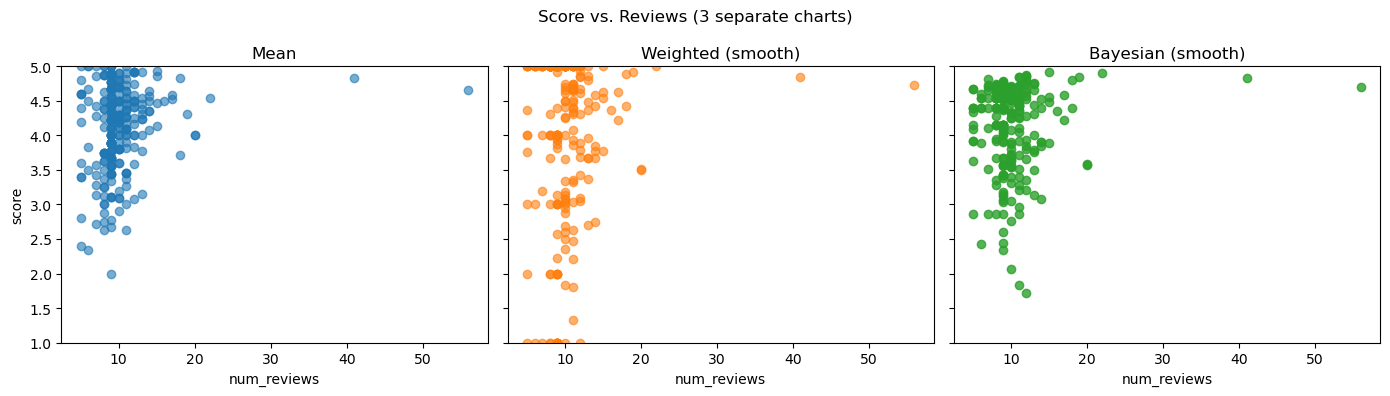

,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth
47,B00068R7W0,1.0,1.0,1.0,1.0,3.359143


,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth
49,B000EVIDUY,22.0,4.545455,4.72973,5.0,4.909562


In [ ]:
# 可视化
req_cols = ['num_reviews','mean_score','weighted_mean_smooth','bayesian_mean_smooth']
sample_base = df_amazon_product_info.dropna(subset=[c for c in req_cols if c in df_amazon_product_info.columns])
sample = (sample_base
          .query('num_reviews>=5')
          .sample(min(300, len(sample_base)), random_state=42) if len(sample_base) > 0 else sample_base)

fig, axes = plt.subplots(1, 3, figsize=(14,4), sharex=True, sharey=True)
axes[0].scatter(sample['num_reviews'], sample['mean_score'], color='C0', alpha=0.6)
axes[0].set_title('Mean')
axes[1].scatter(sample['num_reviews'], sample['weighted_mean_smooth'], color='C1', alpha=0.6)
axes[1].set_title('Weighted (smooth)')
axes[2].scatter(sample['num_reviews'], sample['bayesian_mean_smooth'], color='C2', alpha=0.8)
axes[2].set_title('Bayesian (smooth)')
for ax in axes:
    ax.set_xlabel('num_reviews')
axes[0].set_ylabel('score')
axes[0].set_ylim(1,5)
plt.suptitle('Score vs. Reviews (3 separate charts)')
plt.tight_layout()
plt.show()

# 两个示例
one_review = df_amazon_product_info.query('num_reviews==1').head(1)
sort_key = 'weighted_mean_smooth' if 'weighted_mean_smooth' in df_amazon_product_info.columns else 'num_reviews'
many_reviews = (df_amazon_product_info.query('num_reviews>=20')
                .sort_values(sort_key, ascending=False)
                .head(1))
display(one_review[cols_show[:6]])
display(many_reviews[cols_show[:6]])

## 4. Correlation Between Ratings and Product Descriptions

### 4.1 Correlation with the number of sample images

Spearman correlation coefficient: 0.2966; P value: 2.2e-59


<Axes: xlabel='CountAltImages'>

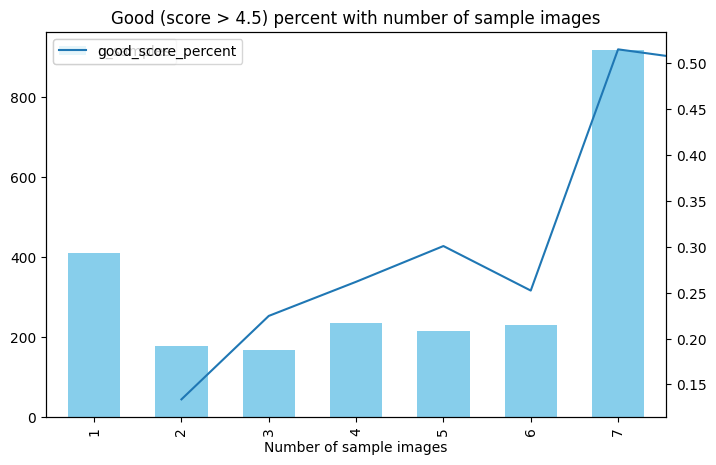

In [16]:
# Compute Spearman's correlation coefficient
tmp = df_amazon_product_info[['Score', 'CountAltImages']].dropna()
corr, p_value = spearmanr(tmp["Score"], tmp["CountAltImages"])

print(f"Spearman correlation coefficient: {corr:.4f}; P value: {p_value:.1e}")

df = df_amazon_product_info[df_amazon_product_info.NumRatings > 10].groupby("CountAltImages").agg(
    good_score_percent=("Score", lambda x: (x > 4.5).mean()), n_samples=("Score", "count"))
ax = df.plot(y='n_samples', kind="bar", color="skyblue", width=0.6, figsize=(8, 5),
             title="Good (score > 4.5) percent with number of sample images", xlabel="Number of sample images")
df.plot(y=['good_score_percent'], ax=ax.twinx())

In [4]:
df_amazon_food_reviews.pivot_table(index=['UserId'], values=['ProductId'], aggfunc='count').sort_values(
    "ProductId", ascending=False)

,ProductId
UserId,
A281NPSIMI1C2R,17
A1YUL9PCJR3JTY,16
A3OXHLG6DIBRW8,10
AXO4PQU0XG3TG,7
AQQLWCMRNDFGI,7
...,...
A2APZJZT4OAKBY,1
A2AQWKT6IZCXZ3,1
A2ARKTFI3SE722,1


In [86]:
p = df_amazon_food_reviews.pivot_table(index=['ProductId'], aggfunc='count')[["Summary"]]
p[p.Summary > 1]

,Summary
ProductId,
6641040,3
7310172001,19
7310172101,16
B00002N8SM,3
B00004CI84,23
...,...
B000GZY8FC,4
B000GZY8W0,2
B000GZY942,2


In [6]:
df_amazon_product_info = df_amazon_product_info[
    df_amazon_product_info.category.apply(lambda x: sum(['food' in e.lower() for e in x])) > 0]


<Axes: xlabel='Score', ylabel='ScorePolarizationIndex'>

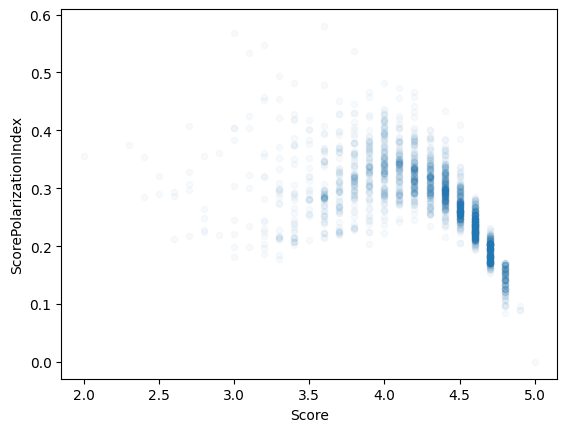

In [248]:
df_amazon_product_info[df_amazon_product_info.NumRatings > 20].plot.scatter(x='Score', y='ScorePolarizationIndex',
                                                                            alpha=0.03)

<Axes: >

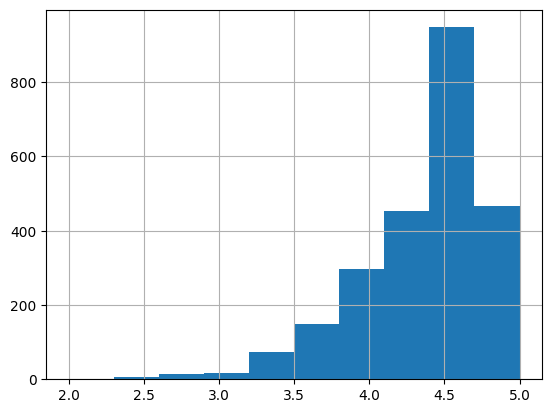

In [255]:
df_amazon_product_info[df_amazon_product_info.NumRatings > 20].Score.hist(bins=10)